In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import stats

In [2]:
csvpath = "hospital_data.csv"
hospital_df = pd.read_csv(csvpath)
hospital_df.head()

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Acute Care Hospitals,Government - Hospital District or Authority,...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
1,010005,MARSHALL MEDICAL CENTERS SOUTH CAMPUS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,(256) 593-8310,Acute Care Hospitals,Government - Hospital District or Authority,...,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN
2,010006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,AL,35630,LAUDERDALE,(256) 768-8400,Acute Care Hospitals,Proprietary,...,Above the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN
3,010007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,(334) 493-3541,Acute Care Hospitals,Voluntary non-profit - Private,...,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Above the national average,NaN,Same as the national average,NaN
4,010008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,(334) 335-3374,Acute Care Hospitals,Proprietary,...,Above the national average,NaN,Not Available,16.0,Same as the national average,NaN,Above the national average,NaN,Not Available,5.0


In [3]:
hospital_df = hospital_df.loc[hospital_df['State'] == 'MN']
hospital_df.head()

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
2429,240001,NORTH MEMORIAL HEALTH,3300 OAKDALE NORTH,ROBBINSDALE,MN,55422,HENNEPIN,(763) 520-5200,Acute Care Hospitals,Voluntary non-profit - Private,...,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
2430,240002,ESSENTIA HEALTH ST MARY'S MEDICAL CENTER,407 EAST THIRD STREET,DULUTH,MN,55805,ST. LOUIS,(218) 786-4000,Acute Care Hospitals,Voluntary non-profit - Private,...,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
2431,240004,HENNEPIN COUNTY MEDICAL CENTER 1,701 PARK AVENUE,MINNEAPOLIS,MN,55415,HENNEPIN,(612) 873-3629,Acute Care Hospitals,Government - Local,...,Above the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
2432,240006,OLMSTED MEDICAL CENTER,1650 FOURTH STREET SOUTHEAST,ROCHESTER,MN,55904,OLMSTED,(507) 287-2761,Acute Care Hospitals,Voluntary non-profit - Private,...,Above the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN
2433,240010,MAYO CLINIC HOSPITAL ROCHESTER,1216 SECOND STREET SOUTHWEST,ROCHESTER,MN,55902,OLMSTED,(507) 255-1991,Acute Care Hospitals,Voluntary non-profit - Church,...,Above the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN


In [4]:
array = ['ANOKA', 'CARVER', 'HENNEPIN', 'DAKOTA', 'RAMSEY',
        'SCOTT', 'WASHINGTON']
hospital_df = hospital_df.loc[hospital_df['County Name'].isin(array)]
hospital_df

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
2429,240001,NORTH MEMORIAL HEALTH,3300 OAKDALE NORTH,ROBBINSDALE,MN,55422,HENNEPIN,(763) 520-5200,Acute Care Hospitals,Voluntary non-profit - Private,...,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
2431,240004,HENNEPIN COUNTY MEDICAL CENTER 1,701 PARK AVENUE,MINNEAPOLIS,MN,55415,HENNEPIN,(612) 873-3629,Acute Care Hospitals,Government - Local,...,Above the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
2441,240038,UNITED HOSPITAL,333 NORTH SMITH AVENUE,SAINT PAUL,MN,55102,RAMSEY,(651) 241-8810,Acute Care Hospitals,Voluntary non-profit - Private,...,Below the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
2448,240053,PARK NICOLLET METHODIST HOSPITAL,6500 EXCELSIOR BLVD,SAINT LOUIS PARK,MN,55426,HENNEPIN,(952) 993-5000,Acute Care Hospitals,Voluntary non-profit - Private,...,Below the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN
2449,240056,RIDGEVIEW MEDICAL CENTER,500 SOUTH MAPLE STREET,WACONIA,MN,55387,CARVER,(952) 442-2191,Acute Care Hospitals,Voluntary non-profit - Private,...,Above the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
2450,240057,ABBOTT NORTHWESTERN HOSPITAL,800 EAST 28TH STREET,MINNEAPOLIS,MN,55407,HENNEPIN,(612) 863-4457,Acute Care Hospitals,Voluntary non-profit - Private,...,Above the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
2451,240059,REGINA HOSPITAL,1175 NININGER ROAD,HASTINGS,MN,55033,DAKOTA,(651) 480-4100,Acute Care Hospitals,Voluntary non-profit - Church,...,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Not Available,5.0
2452,240063,ST JOSEPH'S HOSPITAL,45 WEST 10TH STREET,SAINT PAUL,MN,55102,RAMSEY,(651) 232-3000,Acute Care Hospitals,Voluntary non-profit - Private,...,Above the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
2454,240066,LAKEVIEW MEMORIAL HOSPITAL,927 WEST CHURCHILL STREET,STILLWATER,MN,55082,WASHINGTON,(651) 430-5330,Acute Care Hospitals,Voluntary non-profit - Private,...,Above the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
2459,240078,FAIRVIEW SOUTHDALE HOSPITAL,6401 FRANCE AVENUE SOUTH,EDINA,MN,55435,HENNEPIN,(952) 924-5100,Acute Care Hospitals,Voluntary non-profit - Private,...,Above the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN


In [5]:
columnsNamesArr = hospital_df.columns.values
columnsNamesArr

array(['Facility ID', 'Facility Name', 'Address', 'City', 'State',
       'ZIP Code', 'County Name', 'Phone Number', 'Hospital Type',
       'Hospital Ownership', 'Emergency Services',
       'Meets criteria for meaningful use of EHRs',
       'Hospital overall rating', 'Hospital overall rating footnote',
       'Mortality national comparison',
       'Mortality national comparison footnote',
       'Safety of care national comparison',
       'Safety of care national comparison footnote',
       'Readmission national comparison',
       'Readmission national comparison footnote',
       'Patient experience national comparison',
       'Patient experience national comparison footnote',
       'Effectiveness of care national comparison',
       'Effectiveness of care national comparison footnote',
       'Timeliness of care national comparison',
       'Timeliness of care national comparison footnote',
       'Efficient use of medical imaging national comparison',
       'Efficient use 

In [6]:
hospital_df = hospital_df[['Facility Name','County Name','Hospital Type','Emergency Services']]
hospital_df

,Facility Name,County Name,Hospital Type,Emergency Services
2429,NORTH MEMORIAL HEALTH,HENNEPIN,Acute Care Hospitals,Yes
2431,HENNEPIN COUNTY MEDICAL CENTER 1,HENNEPIN,Acute Care Hospitals,Yes
2441,UNITED HOSPITAL,RAMSEY,Acute Care Hospitals,Yes
2448,PARK NICOLLET METHODIST HOSPITAL,HENNEPIN,Acute Care Hospitals,Yes
2449,RIDGEVIEW MEDICAL CENTER,CARVER,Acute Care Hospitals,Yes
2450,ABBOTT NORTHWESTERN HOSPITAL,HENNEPIN,Acute Care Hospitals,Yes
2451,REGINA HOSPITAL,DAKOTA,Acute Care Hospitals,Yes
2452,ST JOSEPH'S HOSPITAL,RAMSEY,Acute Care Hospitals,No
2454,LAKEVIEW MEMORIAL HOSPITAL,WASHINGTON,Acute Care Hospitals,Yes
2459,FAIRVIEW SOUTHDALE HOSPITAL,HENNEPIN,Acute Care Hospitals,Yes


In [7]:
hospital_df = hospital_df.loc[hospital_df['Emergency Services'] == 'Yes']
hospital_df

,Facility Name,County Name,Hospital Type,Emergency Services
2429,NORTH MEMORIAL HEALTH,HENNEPIN,Acute Care Hospitals,Yes
2431,HENNEPIN COUNTY MEDICAL CENTER 1,HENNEPIN,Acute Care Hospitals,Yes
2441,UNITED HOSPITAL,RAMSEY,Acute Care Hospitals,Yes
2448,PARK NICOLLET METHODIST HOSPITAL,HENNEPIN,Acute Care Hospitals,Yes
2449,RIDGEVIEW MEDICAL CENTER,CARVER,Acute Care Hospitals,Yes
2450,ABBOTT NORTHWESTERN HOSPITAL,HENNEPIN,Acute Care Hospitals,Yes
2451,REGINA HOSPITAL,DAKOTA,Acute Care Hospitals,Yes
2454,LAKEVIEW MEMORIAL HOSPITAL,WASHINGTON,Acute Care Hospitals,Yes
2459,FAIRVIEW SOUTHDALE HOSPITAL,HENNEPIN,Acute Care Hospitals,Yes
2460,"UNIVERSITY OF MINNESOTA MEDICAL CENTER, FAIRVIEW",HENNEPIN,Acute Care Hospitals,Yes


In [8]:
hospital_df = hospital_df.set_index(['County Name'])
hospital_df

,Facility Name,Hospital Type,Emergency Services
County Name,,,
HENNEPIN,NORTH MEMORIAL HEALTH,Acute Care Hospitals,Yes
HENNEPIN,HENNEPIN COUNTY MEDICAL CENTER 1,Acute Care Hospitals,Yes
RAMSEY,UNITED HOSPITAL,Acute Care Hospitals,Yes
HENNEPIN,PARK NICOLLET METHODIST HOSPITAL,Acute Care Hospitals,Yes
CARVER,RIDGEVIEW MEDICAL CENTER,Acute Care Hospitals,Yes
HENNEPIN,ABBOTT NORTHWESTERN HOSPITAL,Acute Care Hospitals,Yes
DAKOTA,REGINA HOSPITAL,Acute Care Hospitals,Yes
WASHINGTON,LAKEVIEW MEMORIAL HOSPITAL,Acute Care Hospitals,Yes
HENNEPIN,FAIRVIEW SOUTHDALE HOSPITAL,Acute Care Hospitals,Yes


In [9]:
#final_hospital = hospital_df.index.value_counts()
final_hospital_df = hospital_df.index.value_counts().rename_axis('COUNTY').reset_index(name='Number of Hospitals')
final_hospital_df = final_hospital_df.sort_values('COUNTY')
final_hospital_df = final_hospital_df.reset_index()
final_hospital_df.to_csv('hospital.csv')

In [10]:
life_path = 'life.csv'
life_df = pd.read_csv(life_path)
life_df = life_df.drop(['Unnamed: 0'], axis =1)
life_df['County'] = life_df['County'].str.replace("County, MN", "", case = False)
life_df

,County,Life Expectancy
0,Anoka,80.140260
1,Carver,82.370588
2,Dakota,80.683333
3,Hennepin,80.320438
4,Ramsey,79.533846
5,Scott,80.809524
6,Washington,81.847917


In [11]:
combined_df = pd.concat([life_df, final_hospital_df], axis=1)
combined_df = combined_df.drop(['COUNTY', 'index'], axis =1)
combined_df

,County,Life Expectancy,Number of Hospitals
0,Anoka,80.140260,1
1,Carver,82.370588,1
2,Dakota,80.683333,2
3,Hennepin,80.320438,8
4,Ramsey,79.533846,3
5,Scott,80.809524,2
6,Washington,81.847917,1


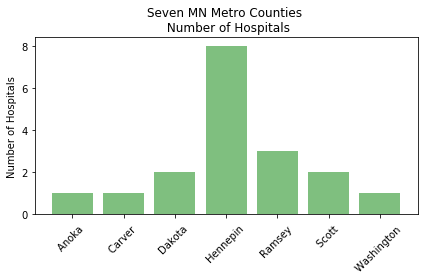

<Figure size 432x288 with 0 Axes>

In [12]:
x_axis = np.arange(len(combined_df))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, combined_df['Number of Hospitals'], color ='g',alpha=0.5, align="center")
plt.xticks(tick_locations, combined_df['County'],rotation ='45')
plt.ylabel('Number of Hospitals')
plt.title('Seven MN Metro Counties \n Number of Hospitals')

fig1 = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
fig1.savefig('hospitals_barchart.png',dpi = 300)

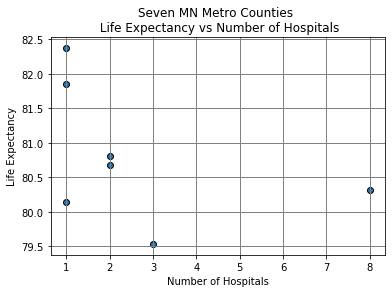

In [13]:
plt.scatter(combined_df['Number of Hospitals'],combined_df['Life Expectancy'], edgecolors='black')
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.xlabel('Number of Hospitals')
plt.ylabel('Life Expectancy')
plt.title('Seven MN Metro Counties \n Life Expectancy vs Number of Hospitals')
plt.show()

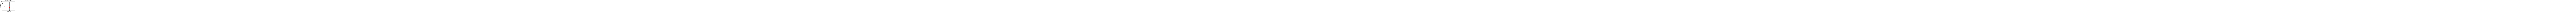

In [16]:
#perform linear regression
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(combined_df['Number of Hospitals'],combined_df['Life Expectancy'])

#regression equation line
p_fit = p_slope * combined_df['Number of Hospitals'] + p_int

#line equation
line_eq = 'y =' + str(round(p_slope,4)) + "x + " + str(round(p_int,2))

fig = plt.figure()
plt.scatter(combined_df['Number of Hospitals'],combined_df['Life Expectancy'], edgecolors="black")
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.plot(combined_df['Number of Hospitals'],p_fit,"--",color="red")
plt.annotate(line_eq,xy=(1500,81.5),fontsize=15,color='blue')
plt.xlabel("Number of Hospitals")
plt.ylabel("Life Expectancy")
plt.title("Seven MN Metro Counties \n Life Expectancy vs Number of Hospitals")
plt.show()
fig.savefig('hospitals.png',dpi=300)

In [15]:
print(f'The r-value is {round(p_r,5)}.')
print(f'The p-value is {round(p_p,5)}.')
print(f'The standard error is {round(p_std_err,5)}.')

The r-value is -0.41507.
The p-value is 0.35445.
The standard error is 0.16018.


Result:
There is no correlation to the number of hospitals and life expectancy.